### Data description

- **Dimensions:** The data has three dimensions: longitude (**`lon`**) with 41 points, latitude (**`lat`**) with 26 points, and time (**`time`**) with 216 points. The longitude ranges from 20 degrees west to 20 degrees east, and the latitude ranges from 45 degrees to 20 degrees north. The time covers monthly intervals from January 1982 to June 2017.
- **Coordinates:**
    - **`lon`**: Longitude, with values from 20 degrees west to 20 degrees east.
    - **`lat`**: Latitude, with values from 45 degrees to 20 degrees north.
    - **`time`**: Time, covering monthly intervals from January 1982 to June 2017.
- **Data Variables:**
    - **`var228`**: A float32 variable over time, latitude, and longitude dimensions.
- **Attributes:** The dataset includes metadata attributes such as the Climate Data Interface (CDI) version, CF (Climate and Forecast) conventions version, a history log, the institution that generated the file (European Centre for Medium-Range Weather Forecasts), and the version of the Climate Data Operators (CDO) used.

This dataset appears to be related to climate data, likely representing some climate variable (indicated as **`var228`**, but the specific nature of this variable is not described ‘precipitation variable’) across a specified geographic area (Morocco) over a 35-year period on a monthly basis.

In [139]:
import xarray as xr

# Load the NetCDF file to inspect its contents
data = xr.open_dataset('C:/Users/DataScience/Desktop/precipitations_forcasting/dataset/obs_oct.nc')

# Display the contents (variables, dimensions, etc.)
data

<xarray.Dataset> Size: 2MB
Dimensions:  (lon: 41, lat: 26, time: 444)
Coordinates:
  * lon      (lon) float64 328B -20.0 -19.0 -18.0 -17.0 ... 17.0 18.0 19.0 20.0
  * lat      (lat) float64 208B 45.0 44.0 43.0 42.0 41.0 ... 23.0 22.0 21.0 20.0
  * time     (time) datetime64[ns] 4kB 1980-12-31T18:00:00 ... 2017-11-30T18:...
Data variables:
    var228   (time, lat, lon) float32 2MB ...
Attributes:
    CDI:          Climate Data Interface version 1.6.4 (http://code.zmaw.de/p...
    Conventions:  CF-1.4
    history:      Sat Apr 01 15:00:04 2023: cdo -f nc copy obs_oct.grib obs_o...
    institution:  European Centre for Medium-Range Weather Forecasts
    CDO:          Climate Data Operators version 1.6.4 (http://code.zmaw.de/p...

### Manipulation

In [140]:
import pandas as pd

# Converting the NetCDF data variable 'var228' to a Pandas DataFrame
df = data['var228'].to_dataframe().reset_index()

df.shape

(473304, 4)

In [141]:
df.to_csv('obs_oct.csv', index=False)

In [142]:
df.head()

,time,lat,lon,var228
0,1980-12-31 18:00:00,45.0,-20.0,0.022766
1,1980-12-31 18:00:00,45.0,-19.0,0.022293
2,1980-12-31 18:00:00,45.0,-18.0,0.018623
3,1980-12-31 18:00:00,45.0,-17.0,0.016083
4,1980-12-31 18:00:00,45.0,-16.0,0.011948


In [143]:
obs_dec = pd.read_csv('obs_dec.csv')
obs_oct = pd.read_csv('obs_oct.csv')
obs_nov = pd.read_csv('obs_nov.csv')

In [144]:
obs_dec['time'] = pd.to_datetime(obs_dec['time'])

# Extract year and month from 'time' column
obs_dec['year'] = obs_dec['time'].dt.year
obs_dec['month'] = obs_dec['time'].dt.month

obs_oct['time'] = pd.to_datetime(obs_oct['time'])

# Extract year and month from 'time' column
obs_oct['year'] = obs_oct['time'].dt.year
obs_oct['month'] = obs_oct['time'].dt.month

obs_nov['time'] = pd.to_datetime(obs_nov['time'])

# Extract year and month from 'time' column
obs_nov['year'] = obs_nov['time'].dt.year
obs_nov['month'] = obs_nov['time'].dt.month

In [145]:
# obs_dec.describe()
# obs_nov.describe()
# obs_oct.describe()

In [146]:
obs = pd.concat([obs_oct, obs_nov, obs_dec], ignore_index=True)

In [147]:
obs = obs.drop_duplicates()

In [148]:
obs['time'] = pd.to_datetime(obs['time'])

# Extract year and month from 'time' column
obs['year'] = obs['time'].dt.year
obs['month'] = obs['time'].dt.month

In [149]:
obs['precip_obs'] = 1000 * obs['var228']
obs = obs.drop(['time', 'var228'], axis=1)

In [150]:
obs

,lat,lon,year,month,precip_obs
0,45.0,-20.0,1980,12,22.766113
1,45.0,-19.0,1980,12,22.293090
2,45.0,-18.0,1980,12,18.623352
3,45.0,-17.0,1980,12,16.082764
4,45.0,-16.0,1980,12,11.947632
...,...,...,...,...,...
473299,20.0,16.0,2017,11,0.000000
473300,20.0,17.0,2017,11,0.000000
473301,20.0,18.0,2017,11,0.000000
473302,20.0,19.0,2017,11,0.000000


In [151]:
est_dec = pd.read_csv('est_dec.csv')
est_oct = pd.read_csv('est_oct.csv')
est_nov = pd.read_csv('est_nov.csv')

In [152]:
est_dec

,time,lat,lon,var228
0,1982-01-01,45.0,-20.0,114.242190
1,1982-01-01,45.0,-19.0,109.765625
2,1982-01-01,45.0,-18.0,106.218750
3,1982-01-01,45.0,-17.0,105.335940
4,1982-01-01,45.0,-16.0,103.375000
...,...,...,...,...
230251,2017-06-01,20.0,16.0,0.351885
230252,2017-06-01,20.0,17.0,0.426104
230253,2017-06-01,20.0,18.0,1.090166
230254,2017-06-01,20.0,19.0,1.437823


In [153]:
est_dec['time'] = pd.to_datetime(est_dec['time'])

# Extract year and month from 'time' column
est_dec['year'] = est_dec['time'].dt.year
est_dec['month'] = est_dec['time'].dt.month

est_dec['precip_est'] = est_dec['var228']
est_dec = est_dec.drop(['time', 'var228'], axis=1)


#oct
est_oct['time'] = pd.to_datetime(est_oct['time'])

# Extract year and month from 'time' column
est_oct['year'] = est_oct['time'].dt.year
est_oct['month'] = est_oct['time'].dt.month

est_oct['precip_est'] = est_oct['var228']
est_oct = est_oct.drop(['time', 'var228'], axis=1)

#nov
est_nov['time'] = pd.to_datetime(est_nov['time'])

# Extract year and month from 'time' column
est_nov['year'] = est_nov['time'].dt.year
est_nov['month'] = est_nov['time'].dt.month

est_nov['precip_est'] = est_nov['var228']
est_nov = est_nov.drop(['time', 'var228'], axis=1)

In [154]:
est_dec

,lat,lon,year,month,precip_est
0,45.0,-20.0,1982,1,114.242190
1,45.0,-19.0,1982,1,109.765625
2,45.0,-18.0,1982,1,106.218750
3,45.0,-17.0,1982,1,105.335940
4,45.0,-16.0,1982,1,103.375000
...,...,...,...,...,...
230251,20.0,16.0,2017,6,0.351885
230252,20.0,17.0,2017,6,0.426104
230253,20.0,18.0,2017,6,1.090166
230254,20.0,19.0,2017,6,1.437823


In [155]:
# est_dec.describe()
# est_nov.describe()
# est_oct.describe()

In [156]:
# obs.describe()

In [157]:
est_dec.shape, obs.shape

((230256, 5), (473304, 5))

In [158]:
dec_merged = pd.merge(est_dec, obs, how='left')
nov_merged = pd.merge(est_nov, obs, how='left')
oct_merged = pd.merge(est_oct, obs, how='left')

In [159]:
dec_merged.shape

(230256, 6)

In [160]:
dec_merged = dec_merged.drop_duplicates()
nov_merged = nov_merged.drop_duplicates()
oct_merged = oct_merged.drop_duplicates()

In [161]:
dec_merged.shape

(230256, 6)

In [162]:
dec_merged.to_csv('dec_merged.csv', index=False)
nov_merged.to_csv('nov_merged.csv', index=False)
oct_merged.to_csv('oct_merged.csv', index=False)

In [163]:
dec_merged.columns

Index(['lat', 'lon', 'year', 'month', 'precip_est', 'precip_obs'], dtype='object')

In [164]:
dec_merged.loc[:, 'bias_dec'] = dec_merged['precip_est'] - dec_merged['precip_obs']
nov_merged.loc[:, 'bias_nov'] = nov_merged['precip_est'] - nov_merged['precip_obs']
oct_merged.loc[:, 'bias_oct'] = oct_merged['precip_est'] - oct_merged['precip_obs']

In [165]:
len(nov_merged), len(est_nov)

(230256, 230256)

In [166]:
nov_merged

,lat,lon,year,month,precip_est,precip_obs,bias_nov
0,45.0,-20.0,1981,12,107.417970,131.149290,-23.731320
1,45.0,-19.0,1981,12,98.339840,126.678470,-28.338630
2,45.0,-18.0,1981,12,92.800780,122.924805,-30.124025
3,45.0,-17.0,1981,12,88.367190,139.038090,-50.670900
4,45.0,-16.0,1981,12,85.582030,123.603820,-38.021790
...,...,...,...,...,...,...,...
230251,20.0,16.0,2017,5,1.878309,0.118256,1.760054
230252,20.0,17.0,2017,5,1.065809,0.591278,0.474531
230253,20.0,18.0,2017,5,1.386122,0.591278,0.794844
230254,20.0,19.0,2017,5,1.241591,1.182556,0.059034


In [168]:
import numpy as np

RMSE_bias_dec = dec_merged.groupby(['month'], as_index=False)['bias_dec'].agg(
    lambda x: np.sqrt((x**2).mean())
)

RMSE_bias_nov = nov_merged.groupby(['month'], as_index=False)['bias_nov'].agg(
    lambda x: np.sqrt((x**2).mean())
)
RMSE_bias_nov = pd.concat([RMSE_bias_nov.iloc[-1:], RMSE_bias_nov.iloc[:-1]], ignore_index=True)

RMSE_bias_oct = oct_merged.groupby(['month'], as_index=False)['bias_oct'].agg(
    lambda x: np.sqrt((x**2).mean())
)
RMSE_bias_oct = pd.concat([RMSE_bias_oct.iloc[-2:], RMSE_bias_oct.iloc[:-2]], ignore_index=True)


In [169]:
RMSE_bias_dec

,month,bias_dec
0,1,36.831786
1,2,31.407774
2,3,28.715006
3,4,25.965685
4,5,23.597865
5,6,19.564068


In [170]:
RMSE_bias_nov

,month,bias_nov
0,12,39.586934
1,1,34.189656
2,2,31.543403
3,3,29.215875
4,4,26.768828
5,5,23.777098


In [171]:
RMSE_bias_oct

,month,bias_oct
0,11,43.385900
1,12,36.161627
2,1,34.059735
3,2,32.503606
4,3,29.698488
5,4,26.693787


In [172]:
RMSE_bias_nov = RMSE_bias_nov.drop(['month'], axis=1)
RMSE_bias_oct = RMSE_bias_oct.drop(['month'], axis=1)

In [173]:
RMSE_bias = pd.concat([RMSE_bias_dec, RMSE_bias_nov, RMSE_bias_oct], ignore_index=True, axis=1)

RMSE_bias.columns = ['month', 'RMSE_dec', 'RMSE_nov', 'RMSE_oct']

In [174]:
RMSE_bias
#hey

,month,RMSE_dec,RMSE_nov,RMSE_oct
0,1,36.831786,39.586934,43.385900
1,2,31.407774,34.189656,36.161627
2,3,28.715006,31.543403,34.059735
3,4,25.965685,29.215875,32.503606
4,5,23.597865,26.768828,29.698488
5,6,19.564068,23.777098,26.693787


In [176]:
RMSE_bias.to_csv('RMSE_bias.csv', index=False)

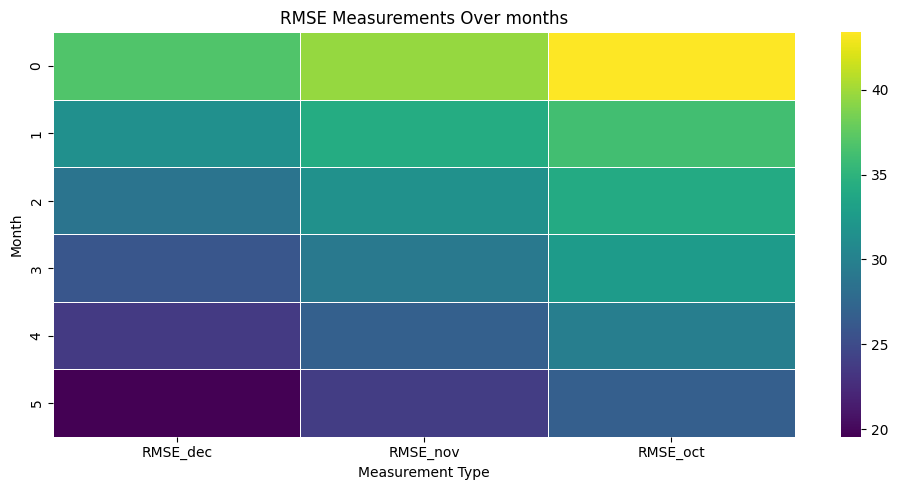

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Your actual DataFrame loading or preparation code here
df = RMSE_bias
# Ensuring the 'year' and 'month' are combined into a single index for better visualization
df.drop(['month'], axis=1, inplace=True)

# Creating the heatmap
plt.figure(figsize=(10, 5))  # Adjust the figure size as necessary
sns.heatmap(df, annot=False, cmap='viridis', linewidths=.5)
plt.title('RMSE Measurements Over months')
plt.xlabel('Measurement Type')
plt.ylabel('Month')
plt.tight_layout()

plt.show()

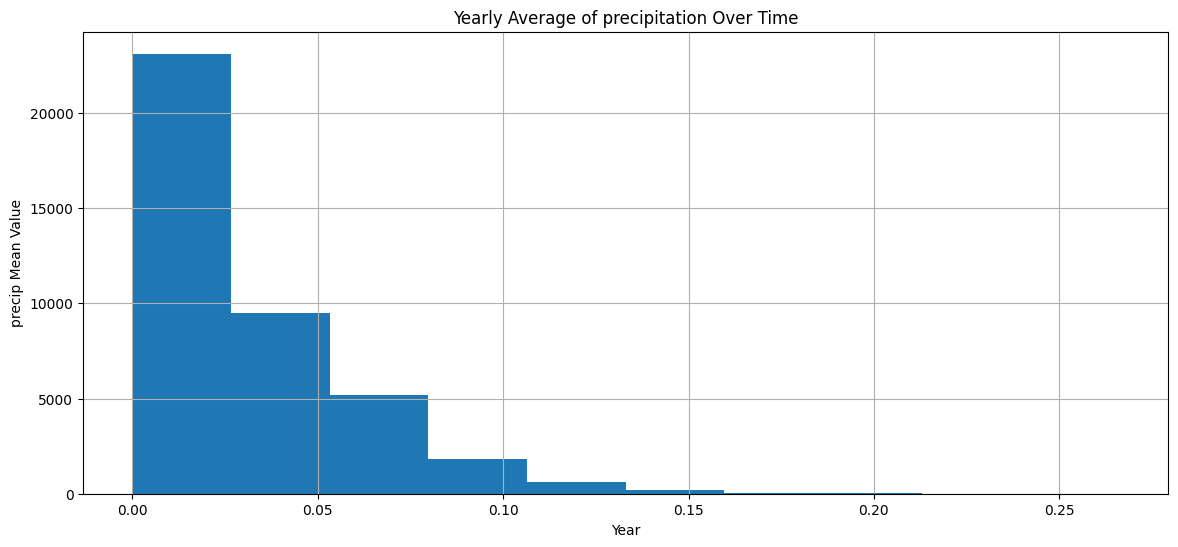

In [ ]:
import matplotlib.pyplot as plt

# Grouping the data by year and averaging over the year
var228_yearly_mean = data['var228'].groupby('time.year').mean()

# Plotting
plt.figure(figsize=(14, 6))
var228_yearly_mean.plot()
plt.title('Yearly Average of precipitation Over Time')
plt.xlabel('Year')
plt.ylabel('precip Mean Value')
plt.grid(True)
plt.show()